## Supervised Learning: Regression
***
data provided by Code Academy

### Linear Regression

#### Euclidean Distance

**Euclidean Distance** is the most commonly used distance formula. To find the Euclidean distance between two points, we first calculate the squared distance between each dimension. If we add up all of these squared differences and take the square root, we’ve computed the Euclidean distance.


$$
d = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + ... + (a_n - b_n)^2}
$$

In [2]:
# Creating a function called euclidean distance

def euclidean_distance(pt1, pt2):
    distance = 0
    for i in range(len(pt1)):
        distance += (pt1[i] - pt2[i]) ** 2
    return distance ** 0.5

# Testing our function
print(euclidean_distance([1, 2], [4, 0]))
print(euclidean_distance([5, 4, 3], [1, 7, 9]))

3.605551275463989
7.810249675906654


#### Manhattan Distance
**Manhattan Distance** is extremely similar to Euclidean distance. Rather than summing the squared difference between each dimension, we instead sum the absolute value of the difference between each dimension. It’s called Manhattan distance because it’s similar to how you might navigate when walking city blocks.

$$
d = |a_1 - b_1| + |a_2 - b_2| + ... + |a_n - b_n| 
$$

In [3]:
# Creating a function called manhattan distance

def manhattan_distance(pt1, pt2):
    distance = 0
    for i in range(len(pt1)):
        distance += abs(pt1[i] - pt2[i])
    return distance

# Testing our function out
print(manhattan_distance([1, 2], [4, 0]))
print(manhattan_distance([5, 4, 3], [1, 7, 9]))

5
13


#### Hamming Distance
**Hamming Distance** is another slightly different variation on the distance formula. Instead of finding the difference of each dimension, Hamming distance only cares about whether the dimensions are exactly equal. When finding the Hamming distance between two points, add one for every dimension that has different values.

In [4]:
# Creating a function called manhattan distance

def hamming_distance(pt1, pt2):
    distance = 0
    for i in range(len(pt1)):
        if pt1[i] != pt2[i]:
            distance += 1
    return distance

# Testing our function
print(hamming_distance([1, 2], [1, 100]))
print(hamming_distance([5, 4, 9], [1, 7, 9]))

1
2


#### SciPy Distances
Now that we have written three distance formulas, we can use Python's SciPy library
- Euclidean Distance .euclidean()
- Manhattan Distance .cityblock()
- Hamming Distance .hamming()

In [5]:
from scipy.spatial import distance

print(distance.euclidean([1, 2], [4, 0]))
print(distance.cityblock([1, 2], [4, 0]))
print(distance.hamming([5, 4, 9], [1, 7, 9]))

3.605551275463989
5
0.6666666666666666


#### Linear Regression
A line is determined by its slope and its intercept. In other words, for each point y on a line we can say:

$$
y = mx + b
$$
where $m$ is the slope, and $b$ is the intercept. $y$ is a given point on the y-axis, and it corresponds to a given x on the x-axis.

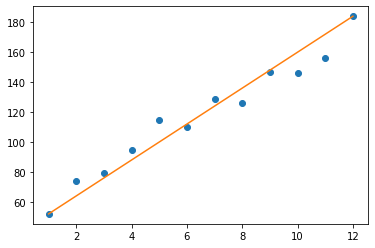

In [6]:
import matplotlib.pyplot as plt
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# slope:
m = 12
# intercept:
b = 40

# y values:
y = [i * m + b for i in months]

plt.plot(months, revenue, "o")
plt.plot(months, y, "-")
plt.show()

#### Loss
When we think about how we can assign a slope and intercept to fit a set of points, we have to define what the best fit is.

For each data point, we calculate loss, a number that measures how bad the model’s (in this case, the line’s) prediction was. 

In this case we take the squared difference between the $y$ value and $y_{predicted}$

In [7]:
# Dummy x and y values
x = [1, 2, 3]
y = [5, 1, 3]

# y = x
m1 = 1
b1 = 0

# y = 0.5x + 1
m2 = 0.5
b2 = 1

# Our predicted Values
y_predicted1 = [i * m1 + b1 for i in x]
y_predicted2 = [j * m2 + b2 for j in x]

# Calculating the loss for each line
total_loss1 = 0
for i in range(len(x)):
  diff = y[i] - y_predicted1[i]
  total_loss1 += diff**2

total_loss2 = 0
for i in range(len(x)):
  diff = y[i] - y_predicted2[i]
  total_loss2 += diff**2


print('total loss 1:', total_loss1)
print('total loss 2', total_loss2)

total loss 1: 17
total loss 2 13.5


#### Gradient Descent for Intercept
As we try to minimize loss, we take each parameter we are changing, and move it as long as we are decreasing loss. It’s like we are moving down a hill, and stop once we reach the bottom.

The process by which we do this is called **gradient descent**. We move in the direction that decreases our loss the most. _Gradient_ refers to the slope of the curve at any point.

To find the gradient of loss as intercept changes:
$$
- \frac{2}{N} \sum_{i=1}^{N} (y_i - (mx_i + b))

$$

- $N$ is the number of points we have in our dataset
- $m$ is the current gradient guess
- $b$ is the current intercept guess

In [8]:
# Defining our get gradient function for intercept
def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

#### Gradient Descent for slope
We have a function to find the gradient of b at every point. To find the m gradient, or the way the loss changes as the slope of our line changes, we can use this formula:

$$
- \frac{2}{N} \sum_{i=1}^{N} x_i(y_i - (mx_i + b))
$$
where:
- $N$ is the number of points you have in your dataset
- $m$ is the current gradient guess
- $b$ is the current intercept guess

In [9]:
# Defining our get gradient function for slope
def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

#### Putting it all together - Step Gradient
Now that we know how to calculate the gradient, we want to take a “step” in that direction. However, it’s important to think about whether that step is too big or too small. We don’t want to overshoot the minimum error!

We can scale the size of the step by multiplying the gradient by a _learning rate_.

To find a new b value, we would say:
```
new_b = current_b - (learning_rate * b_gradient)
```

In [10]:
# Defining our step_gradient function
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]

# Testing our function out

# Dummy Values
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# current intercept guess:
b = 0
# current slope guess:
m = 0

# Call your function here to update b and m
b, m = step_gradient(b, m, months, revenue, 0.01)

print('b:', b, 'm:', m)

b: 2.355 m: 17.78333333333333


#### Convergence & Learning Rate
How do we know when we should stop changing the parameters $m$ and $b$? How will we know when our program has learned enough?

To answer this, we have to define convergence. Convergence is when the loss stops changing (or changes very slowly) when parameters are changed.

We want our program to be able to iteratively _learn_ what the best $m$ and $b$ values are. So for each $m$ and $b$ pair that we guess, we want to move them in the direction of the gradients we’ve calculated. But how far do we move in that direction?

We have to choose a learning rate, which will determine how far down the loss curve we go.

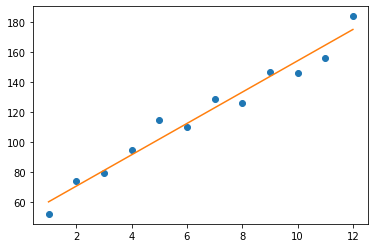

In [11]:
# Defining our gradient descent function
def gradient_descent(x, y, learning_rate, num_iterations):
    
    # Initial Guesses
    b = 0
    m = 0
    for i in range(num_iterations):
      b, m = step_gradient(b, m, x, y, learning_rate)

    return b, m


# testing our function

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)

#Uncomment the lines below to see the line you've settled upon!
y_new = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y_new)

plt.show()



#### Scikit-Learn
Scikit-learn, or sklearn, is used specifically for Machine Learning. Inside the linear_model module, there is a LinearRegression() function we can use:

```
from sklearn.linear_model import LinearRegression
```


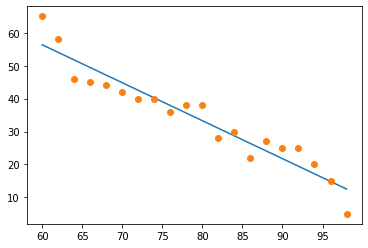

In [12]:
# Importing the module
from sklearn.linear_model import LinearRegression
import numpy as np

# Dummy Values
temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

# Using sklearn linear regression model
line_fitter = LinearRegression()
line_fitter.fit(temperature, sales)
sales_predict = line_fitter.predict(temperature)
plt.plot(temperature, sales_predict)


plt.plot(temperature, sales, 'o')
plt.show()

### Multiple Linear Regression

**Multiple Linear Regression** uses two or more independent variables to predict the values of the dependent variable.

$$
y = b + m_1x_1 + m_2x_2 + ... + m_nx_n
$$

We will be using Multiple Linear Regression on a data set that contains information about apartments in New York
The data is broken up into 

- [manhattan.csv](https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv)
- [brooklyn.csv](https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/brooklyn.csv)
- [queens.csv](https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv)

In [13]:
# Importing Pandas
import pandas as pd

# Taking a look into the manhattan dataset
df = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv")

df.head()


,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


#### Training Set vs. Test Set
As with most machine learning algorithms, we have to split our dataset into:

- **Training set:** the data used to fit the model
- **Test set:** the data partitioned away at the very start of the experiment (to provide an unbiased evaluation of the model)

In general, putting 80% of your data in the training set and 20% of your data in the test set is a good place to start.

In [14]:
# Importing train-test split
from sklearn.model_selection import train_test_split

# Creating our x and y values
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 
'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 
'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

# Using the test train split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=6)

# Printing the shapes of the data
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (2831, 14)
x_test shape: (708, 14)
y_train shape: (2831, 1)
y_test shape: (708, 1)


In [20]:
# Importing the Linear Regression model from SK-learm
from sklearn.linear_model import LinearRegression

# Building the model
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_predict = mlr.predict(x_test)

# Testing the model on Sonnies appartment
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
 
predict = mlr.predict(sonny_apartment)
 
print("Predicted rent: $%.2f" % predict)
print('Sonny is only paying $2000!')
print('\nThe Coefficients of the data are:')
print(mlr.coef_)

Predicted rent: $2393.58
Sonny is only paying $2000!

The Coefficients of the data are:
[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


/Users/amritpalbasi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


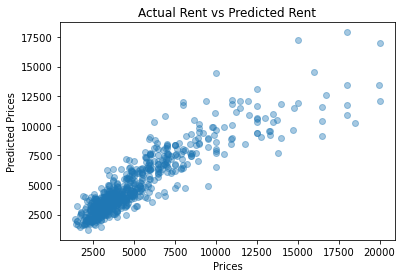

In [19]:
# Plotting the data
plt.scatter(y_test, y_predict, alpha=0.4)
plt.title('Actual Rent vs Predicted Rent')
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')

plt.show()

#### Evaluating the Model's Accuracy
One technique we can use is Residual Analysis.

The difference between the actual value $y$, and the predicted value $\hat{y}$ is the residual $e$. The equation is:
$$
e = y - \hat{y}
$$
sklearn‘s ```linear_model.LinearRegression``` comes with a ```.score()``` method that returns the coefficient of determination $R^2$ of the prediction.

$R^2$ Can be defined as:
$$
R^2 = 1 - \frac{u}{v}
$$

Where:
- $u$ is the residual sum of squares ```((y - y_predict) ** 2).sum()```
- $v$ is the total sum of squares ```((y - y.mean()) ** 2).sum()```

The total sum of squares will tell you how much variation there is in the y variable. $R^2$ is the percentage variation in y. The best possible result is 1.00.

For example is we are trying to predict ```rent``` based on ```size_sqft``` and ```bedrooms``` in the apartment and the $R^2$ is 0.72 - this means square feet and number of bedrooms explain 72% variation in y (```rent```)

In [30]:
# Calculating the R squared score
rs_score = mlr.score(x_test, y_test)
print('The R Squared Score is:', rs_score)
print('This means that ~80% of the variance in rent can be explained by the features selected for this model')

The R Squared Score is: 0.805037197535764
This means that ~80% of the variance in rent can be explained by the features selected for this model
